In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA

In [12]:
import datetime as dt
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

In [3]:
temperature = [24, 34.38, 34.36, 34.74, 35.26, 35.23, 35.29, 35.64, 36.02, 36.1, 36.98, 37.01, 36.75, 36.01, 35.66, 34.72, 
               33.9, 32.62, 31.51, 30.73, 29.5, 26.94, 25.47, 23.84, 22.55]
startDate = '2013-01-01'
endDate = '2013-01-01'
n = 1

In [69]:
f = (pd.to_datetime(startDate) - pd.to_datetime(endDate))/pd.Timedelta('1d')

In [77]:
dti = pd.date_range("2013-01-01", periods=int(f+1)*25, freq="H")

In [86]:
len(dti), len(output)

(25, 24)

In [54]:
output = [36.02, 36.1, 36.98, 37.01, 36.75, 36.01, 35.66, 34.72, 33.9, 32.62, 31.51, 30.73, 29.5, 26.94, 25.47, 23.84, 
          22.55, 21.03, 19.92, 18.77, 18.48, 18.07, 17.91, 17.11]

In [102]:
series = pd.DataFrame(temperature, columns=['temperature'])
output = pd.DataFrame(output, columns=['output'])

In [103]:
series

,temperature
0,24.00
1,34.38
2,34.36
3,34.74
4,35.26
5,35.23
6,35.29
7,35.64
8,36.02
9,36.10


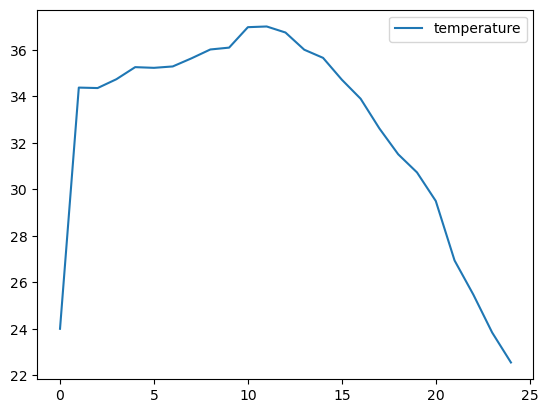

In [104]:
series.plot()
pyplot.show()

In [192]:
model = ARIMA(series, order = (1,0,0) , seasonal_order=(1, 0, 0, 24))
model_fit = model.fit()

C:\Users\ghvi0001\Anaconda3\envs\lta_geo\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'


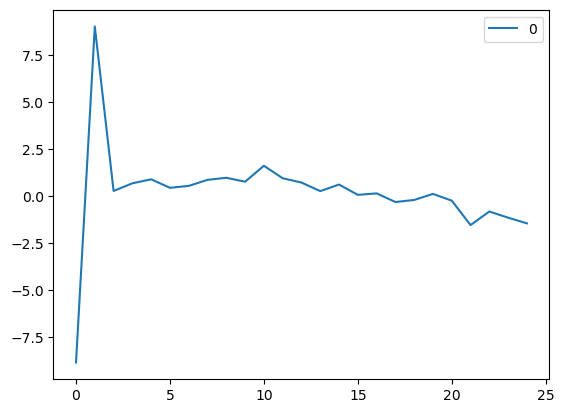

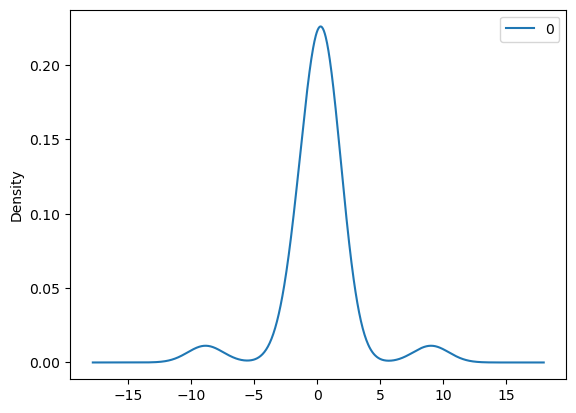

               0
count  25.000000
mean    0.175201
std     2.699655
min    -8.866963
25%    -0.242872
50%     0.274242
75%     0.766790
max     9.039775


In [193]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())

In [194]:
N = 24
ts_pred = model_fit.forecast(steps=N)

In [195]:
type(ts_pred)

pandas.core.series.Series

In [196]:
ts_pred1 = pd.DataFrame(ts_pred).reset_index(drop=True)

In [197]:
ts_pred1

,predicted_mean
0,32.672127
1,32.907733
2,33.481939
3,34.154995
4,34.279362
5,34.464970
6,34.904778
7,35.355959
8,35.508969
9,36.406745


In [198]:
ser = output.join(ts_pred1)
# len(model_fit.forecast(steps=N))

In [199]:
ser['diff'] = abs(ser['output']-ser['predicted_mean'])

In [200]:
ser['diff']>5

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11     True
12     True
13     True
14     True
15     True
16     True
17     True
18     True
19     True
20     True
21     True
22     True
23     True
Name: diff, dtype: bool

In [173]:
seasonality_order = (1, 0, 0, 24)